In [2]:
from sklearn import cluster
from sklearn.cluster import KMeans
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
   
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

os.chdir('/Users/ruchikasingh/Documents/NYUSPS/PY/\')

In [3]:
df = pd.read_csv("moddata.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Columns: 113 entries, Target Text to Question.in.sub.headline
dtypes: float64(7), int64(15), object(91)
memory usage: 2.8+ MB


In [11]:
df.head()

,Target Text,Target,Static Target Median,Dynamic Target Median Vendor Plan Only,Dynamic Target Median Vendor Plan Size,Dynamic Target Mean,Dynamic Target Mean +1STDV,idkey,plan_name,Cloud.Audience.Led,...,Fear.in.headline,Fear...threat.in.sub.headline,Product.Mention.in.headline,Product.Mention.in.sub.headline,IBM.in.headline,IBM.named.in.sub.headline,Statistic.in.headline,Statistic.in.sub.headline,Question.in.headline,Question.in.sub.headline
0,High,1,1,1,1,1,0,Watson Customer EngagementMediaMath,Watson Customer Engagement,No,...,No,No,No,No,No,No,No,No,No,No
1,High,1,1,1,1,1,0,Watson Customer EngagementMediaMath,Watson Customer Engagement,No,...,No,No,No,No,No,No,No,No,No,No
2,High,1,1,1,1,1,1,Watson Customer EngagementMediaMath,Watson Customer Engagement,No,...,No,No,No,No,No,No,No,No,No,No
3,Low,0,0,0,0,0,0,Watson Customer EngagementMediaMath,Watson Customer Engagement,No,...,No,No,No,No,No,No,No,No,No,No
4,Low,0,0,0,0,0,0,Watson Customer EngagementMediaMath,Watson Customer Engagement,No,...,No,No,No,No,No,No,No,No,No,No


In [6]:
list(df.columns)

['Target Text',
 'Target',
 'Static Target Median',
 'Dynamic Target Median Vendor Plan Only',
 'Dynamic Target Median Vendor Plan Size',
 'Dynamic Target Mean',
 'Dynamic Target Mean +1STDV',
 'idkey',
 'plan_name',
 'Cloud.Audience.Led',
 'vendor',
 'CBSi',
 'IDGE',
 'unit_size',
 'size1',
 'size2',
 'size3',
 'banner.area',
 'total.text.char.banner',
 'text.proportion.banner',
 'delivery',
 'Logo.visible.',
 'Logo.colour',
 'CTA.used.',
 'Body.text.Y.N.',
 'Banner.background.Type',
 'Banner.font.Type',
 'Banner.font.over.background',
 'CTA.background',
 'CTA.background.type',
 'CTA.font',
 'CTA.font.type',
 'Image.used.',
 'Humans.Used',
 'Human.Type',
 'Explicit.offer.',
 'Offer.type',
 'Product.in.text..Y.N.',
 'Social...tag.used.',
 'Headline.length',
 'Sub.headline.length',
 'CTA.length',
 'Question.in.text',
 'Statistic.in.text',
 'IBM.in.text',
 'Product.Mention.Text',
 'Fear.in.text',
 'Pain.Point.in.text',
 'Educational.in.text',
 'Aspirational.in.text',
 'IBM.as.leader.in.t

In [7]:
df['Target'].values.sum()

1639

In [8]:
3289-1639

1650

In [9]:
1639/3289

0.4983277591973244

In [10]:
#49.8% 1 and 50.2% 0s


In [12]:
#readingrawdatawithimpressions
df_raw = pd.read_csv("rawdf.csv")

In [19]:
df_raw.head()

,S.no.,sizmek_id,Weekday,plan_name,program_name,vendor,unit_size,delivery,Logo.visible.,Logo.colour,...,Product.in.text..Y.N.,Social...tag.used.,Commments,Headline.length,Sub.headline.length,CTA.length,impressions,clicks,ctr,clickthru
0,1,"26,219,271",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,23696,29,0.12%,0.122384
1,2,"26,219,302",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,212055,445,0.21%,0.209851
2,3,"26,219,331",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,18020,4,0.02%,0.022198
3,4,"26,219,417",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,18046,1,0.01%,0.005541
4,5,"26,278,246",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,12298,5,0.04%,0.040657


In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 37 columns):
S.no.                    3543 non-null int64
sizmek_id                3543 non-null object
Weekday                  3543 non-null object
plan_name                3543 non-null object
program_name             3543 non-null object
vendor                   3543 non-null object
unit_size                3543 non-null object
delivery                 3543 non-null object
Logo.visible.            3543 non-null object
Logo.colour              3543 non-null object
CTA.used.                3543 non-null object
Body.text                3543 non-null object
Plan                     3543 non-null object
Headline.text            3543 non-null object
Concept                  3543 non-null object
Sub.headline.text        3543 non-null object
CTA.text                 3543 non-null object
Banner.background        3543 non-null object
Banner.font              3543 non-null object
CTA.background      

In [13]:
cols = list(df_raw.columns)

In [14]:
coltype = df_raw.dtypes

In [15]:
print(coltype)

S.no.                     int64
sizmek_id                object
Weekday                  object
plan_name                object
program_name             object
vendor                   object
unit_size                object
delivery                 object
Logo.visible.            object
Logo.colour              object
CTA.used.                object
Body.text                object
Plan                     object
Headline.text            object
Concept                  object
Sub.headline.text        object
CTA.text                 object
Banner.background        object
Banner.font              object
CTA.background           object
CTA.font                 object
Image.used.              object
Humans.Used              object
Human.Type               object
Explicit.offer.          object
Offer.type               object
Product.name             object
Product.in.text          object
Product.in.text..Y.N.    object
Social...tag.used.       object
Commments                object
Headline

In [16]:
df_raw['clickthru'] = (df_raw.clicks/df_raw.impressions)*100

In [17]:
type(df_raw.clickthru)

pandas.core.series.Series

In [25]:
#Question 1 : Can you count something interesting?
# looking for impressions and CTR for weekend vs. Weekday

wday_trend = pd.DataFrame(pd.pivot_table(df_raw,values = ['impressions','clicks'],index=['Weekday'], aggfunc='sum'))


In [34]:
print(wday_trend)

         clicks  impressions       CTR  Share_Imp  Share_Click
Weekday                                                       
Weekday  149120    260533227  0.000572   0.766989     0.721676
Weekend   57510     79149965  0.000727   0.233011     0.278324


In [33]:
#Calculating CTR for weekday vs. weekend

wday_trend['CTR'] = wday_trend['clicks']/wday_trend['impressions']
wday_trend['Share_Imp'] = wday_trend['impressions']/wday_trend['impressions'].sum()
wday_trend['Share_Click'] = wday_trend['clicks']/wday_trend['clicks'].sum()

In [ ]:
#Question 1 : Can you count something interesting?
#Answer 1 : Weekday impression make 77% of total impressions. however CTR is higher for weekend. probably 
#due to lower volumes

In [ ]:
#can you make histograms
# historgrams for impressions,clicks and CTR

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


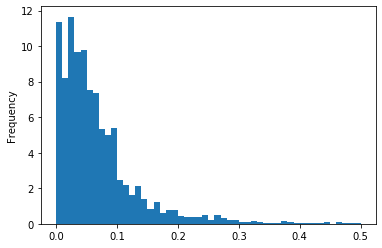

In [18]:
df_raw['clickthru'].plot(kind = 'hist',bins = 50,normed = True,range = (0, 0.5))

In [54]:
col = ['clicks','clickthru','impressions']

In [61]:
def drawhist(col):
    for i in col:
        df_raw[i].plot(kind = 'hist',bins = 50,normed = True)
        plt.show()
    return()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


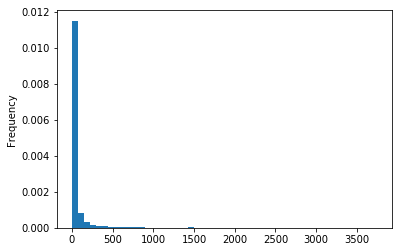

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


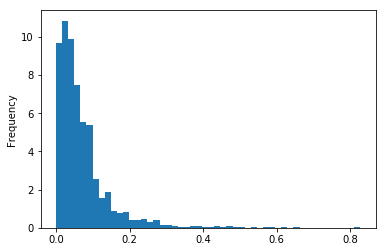

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


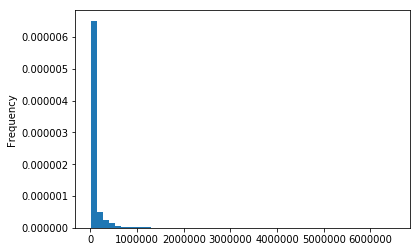

()

In [62]:
drawhist(col)

In [63]:
#findingindex of df_raw
print(df_raw.index)

RangeIndex(start=0, stop=3543, step=1)


In [64]:
type(df_raw.index)

pandas.core.indexes.range.RangeIndex

In [65]:
#deleting old ctr column
del df_raw['ctr']

In [36]:
df = df_raw

In [37]:
df.head()

,S.no.,sizmek_id,Weekday,plan_name,program_name,vendor,unit_size,delivery,Logo.visible.,Logo.colour,...,Product.in.text..Y.N.,Social...tag.used.,Commments,Headline.length,Sub.headline.length,CTA.length,impressions,clicks,ctr,clickthru
0,1,"26,219,271",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,23696,29,0.12%,0.122384
1,2,"26,219,302",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,212055,445,0.21%,0.209851
2,3,"26,219,331",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,18020,4,0.02%,0.022198
3,4,"26,219,417",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,18046,1,0.01%,0.005541
4,5,"26,278,246",Weekday,Watson Customer Engagement,Watson Supply Chain - Supply Chain Insights,MediaMath,300x250,web,Yes,White,...,No,No,0,46,0,0,12298,5,0.04%,0.040657


In [38]:
#can you compare two quantities?
#how do median clickthrus of plans compare to each other.
#first look at univariate analysis of all columsn

df.describe()



,S.no.,Headline.length,Sub.headline.length,CTA.length,impressions,clicks,clickthru
count,3543.000000,3543.000000,3543.000000,3543.000000,3.543000e+03,3543.000000,3543.000000
mean,1772.000000,49.482924,9.066328,14.160316,9.587445e+04,58.320632,0.068298
std,1022.920329,18.741584,20.156008,7.040957,3.113060e+05,200.493413,0.071022
min,1.000000,0.000000,0.000000,0.000000,1.002000e+03,0.000000,0.000000
25%,886.500000,34.000000,0.000000,10.000000,4.920500e+03,2.000000,0.024674
50%,1772.000000,50.000000,0.000000,11.000000,1.875000e+04,9.000000,0.049334
75%,2657.500000,61.000000,0.000000,18.000000,6.769950e+04,35.000000,0.088980
max,3543.000000,105.000000,108.000000,42.000000,6.525232e+06,3739.000000,0.827815


In [ ]:
#How do click thrus compare by plan, program and vendor



In [47]:
plan_Comp = pd.DataFrame(pd.pivot_table(df,values = ['impressions','clickthru'],index=['plan_name'], aggfunc={'impressions':np.sum,'clickthru':np.median}))


In [48]:
print(plan_Comp)

                            clickthru  impressions
plan_name                                         
Cloud Audience-Led           0.074506     13203031
Hybrid Cloud                 0.053964     90738557
Security                     0.035288     83064817
Systems                      0.071974     45853702
Watson Customer Engagement   0.045610    106823085


<Figure size 1440x5760 with 0 Axes>

<Figure size 1440x5760 with 0 Axes>

In [90]:
#how do i increase the size of the chart?
plt.rcParams['figure.figsize'] = (25,10)
#make your plot appear within  notebook
%matplotlib inline

In [94]:
#changing font size of the plots
matplotlib.rcParams.update({'font.size': 18})

In [88]:
plan_Comp = pd.DataFrame(pd.pivot_table(df,values = ['impressions','clickthru'],index=['plan_name'], aggfunc={'impressions':np.sum,'clickthru':np.median}))


<BarContainer object of 3543 artists>

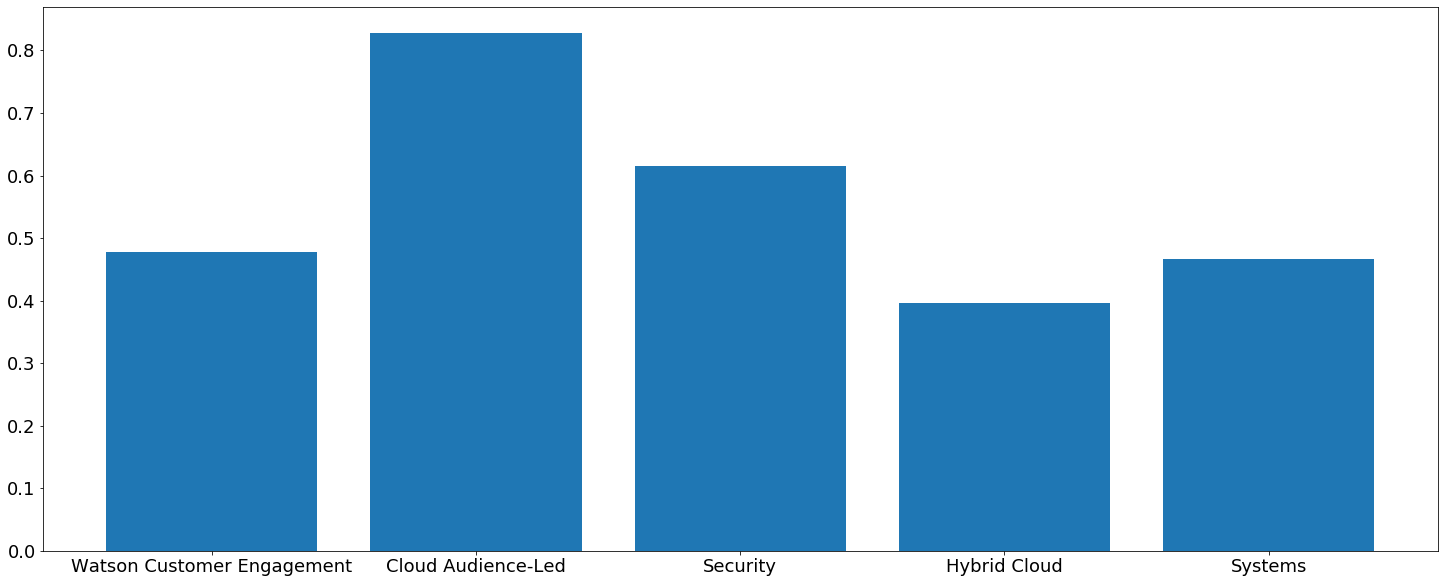

In [95]:
plt.bar(df['plan_name'],df['clickthru'])

In [ ]:
# Cloud audience led and Systems have the highest CTR# CTR ranges from 0.4 to 0.8 across plans

In [ ]:
#cloud audience led and Systems have higher CTR than the rest of the plans and I want to understand why but before further investigation I am checking if is it happening becvause of the volumes and if the differece is significant


In [ ]:
#looking at impression volumes these differences seem signficant. 
#Hypothesis 1 : these campaigns are using a different vendor mix and may be impacting the CTR


In [45]:
#checking hypothesis 1 if CTR is variable by vendor
ven_Comp = pd.DataFrame(pd.pivot_table(df,values = ['impressions','clickthru'],index=['vendor'], aggfunc={'impressions':np.sum,'clickthru':np.median}))


In [46]:
print(ven_Comp)

                   clickthru  impressions
vendor                                   
BBC                 0.164693       949367
BusinessInsider     0.037143     25992335
CBSi                0.027396      2896764
DONOTUSEDzone.com   0.221522        11737
Dzone.com           0.165947       294027
Forbes              0.062844       856308
IDGE                0.134028      1427509
LINKEDIN.COM_MM     0.028201      2376138
MediaMath           0.048132    249002163
NYT                 0.221696     11595856
QuinStreet          0.247517       585922
StackOverflow       0.028180     21945648
Stackoverflow       0.035244      3594995
TechTarget          0.088392         4751
TheRegister         0.163757       270566
WashingtonPost      0.112592     13319073
Wired               0.017482      4227087
ZiffDavis           0.010209       332946


<BarContainer object of 18 artists>

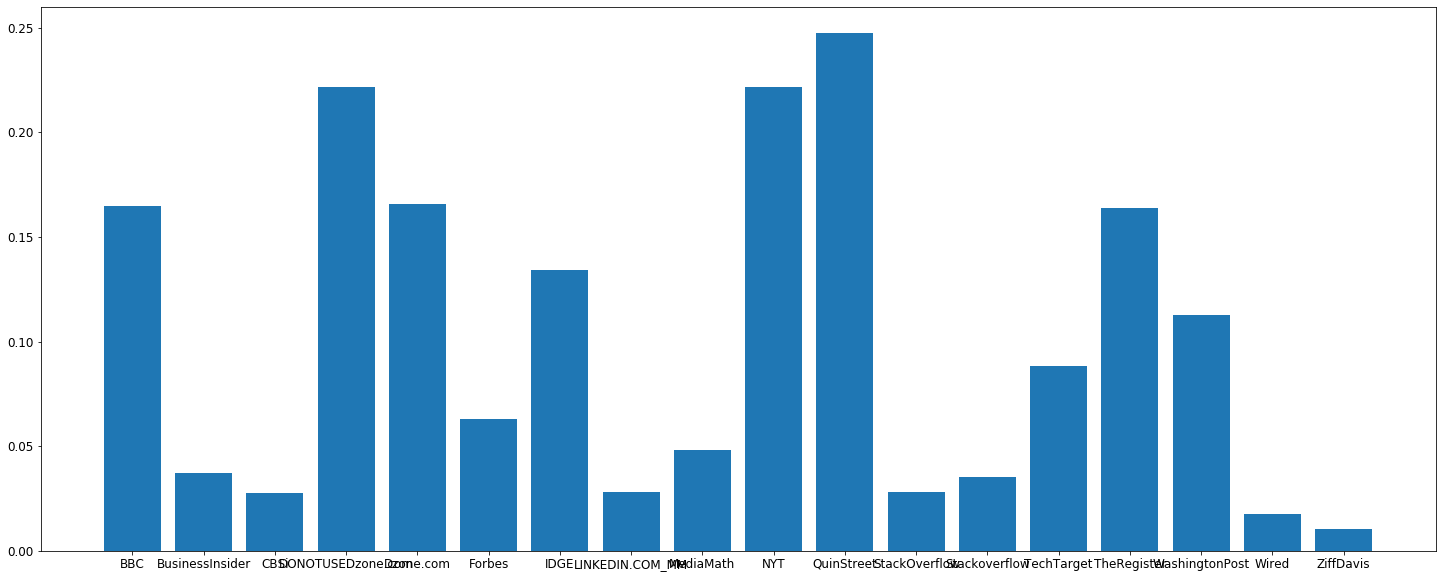

In [107]:
plt.bar(ven_Comp.index,ven_Comp['clickthru'])
#how to increase the size of the x axis?

In [106]:
plt.rcParams.update({'font.size': 12})

In [83]:
#sorting the output

ven_Comp_sorted['share_imp'] = ven_Comp_sorted['impressions']/ven_Comp_sorted['impressions'].sum()


In [85]:
print(ven_Comp_sorted)

                   clickthru  impressions  share_imp
vendor                                              
QuinStreet          0.247517       585922   0.001725
NYT                 0.221696     11595856   0.034137
DONOTUSEDzone.com   0.221522        11737   0.000035
Dzone.com           0.165947       294027   0.000866
BBC                 0.164693       949367   0.002795
TheRegister         0.163757       270566   0.000797
IDGE                0.134028      1427509   0.004202
WashingtonPost      0.112592     13319073   0.039210
TechTarget          0.088392         4751   0.000014
Forbes              0.062844       856308   0.002521
MediaMath           0.048132    249002163   0.733042
BusinessInsider     0.037143     25992335   0.076519
Stackoverflow       0.035244      3594995   0.010583
LINKEDIN.COM_MM     0.028201      2376138   0.006995
StackOverflow       0.028180     21945648   0.064606
CBSi                0.027396      2896764   0.008528
Wired               0.017482      4227087   0.

In [ ]:
#Observation
# NYT and Washington post have high CTRs. Media Math has low CTR with highest share of impressions
#mediamath as 73% of total shares

In [117]:
# Some vendors such as NYT and Quinstreet  have higher CTR than the others. 
#next step is to check if Cloud Audience Led and Systems have higher share of impressions from these vendors.

Plan_Vendor = pd.DataFrame(pd.pivot_table(df,values = ['impressions','clickthru'],
                                       index=['vendor'], columns = ['plan_name'],
                                       aggfunc={'impressions':np.sum}))


In [118]:
#printing Plan_Vendor
print(Plan_Vendor)

                         impressions                                       \
plan_name         Cloud Audience-Led Hybrid Cloud    Security     Systems   
vendor                                                                      
BBC                              NaN          NaN         NaN    949367.0   
BusinessInsider                  NaN     103499.0         NaN         NaN   
CBSi                             NaN    2146623.0         NaN    750141.0   
DONOTUSEDzone.com                NaN          NaN     11737.0         NaN   
Dzone.com                        NaN          NaN    294027.0         NaN   
Forbes                           NaN          NaN         NaN    856308.0   
IDGE                             NaN          NaN         NaN   1427509.0   
LINKEDIN.COM_MM                  NaN    2376138.0         NaN         NaN   
MediaMath                 13203031.0   82184356.0  60222732.0  12457795.0   
NYT                              NaN          NaN         NaN  11595856.0   

In [ ]:
#Answer to hypothesis1 : Cloud Audience Led Performance is not driven by higher impression from nYT 
#but systems performance may be driven by it



In [ ]:
#Hypothesis 2 : Higher CTR may be just a function of lower volume. In essence CTR decreases as Impressions go up
# method of analysis : Draw a scatter plot between impression and CTR

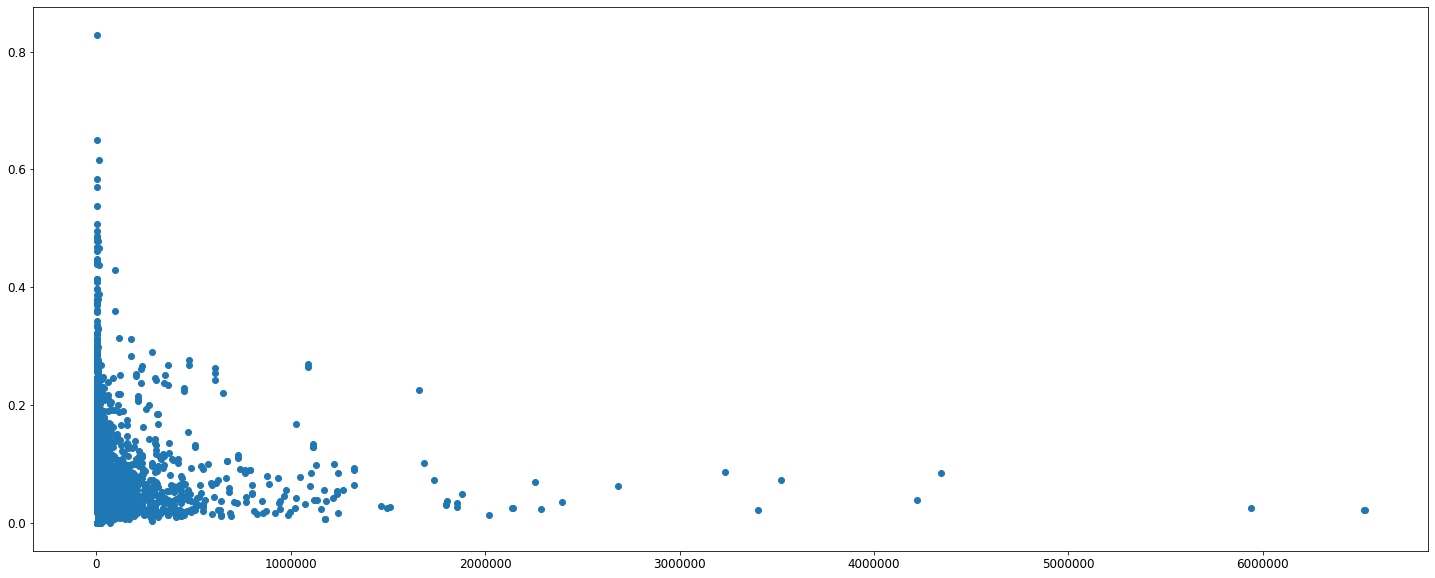

In [122]:
#scatter plot between impression and clickthru

plt.scatter(df['impressions'], df['clickthru'])

In [ ]:
#Answer to hypothesis one : high variance within impressions so replotting scatter after removing outliers

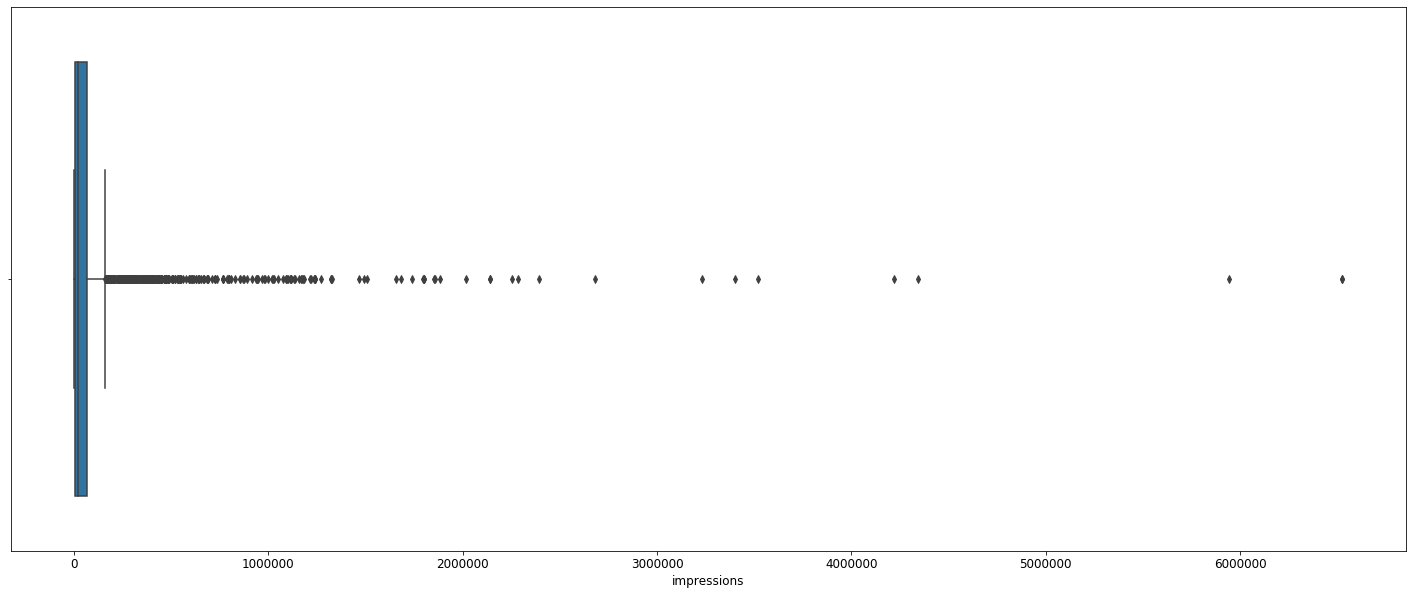

In [127]:
# removing outliers in terms of impressions

import seaborn as sns
sns.boxplot(x=df['impressions'])

In [133]:
# replotting scatter with all ads less than 1M impressions.

df_Scat = df[df['impressions'] < 161000]

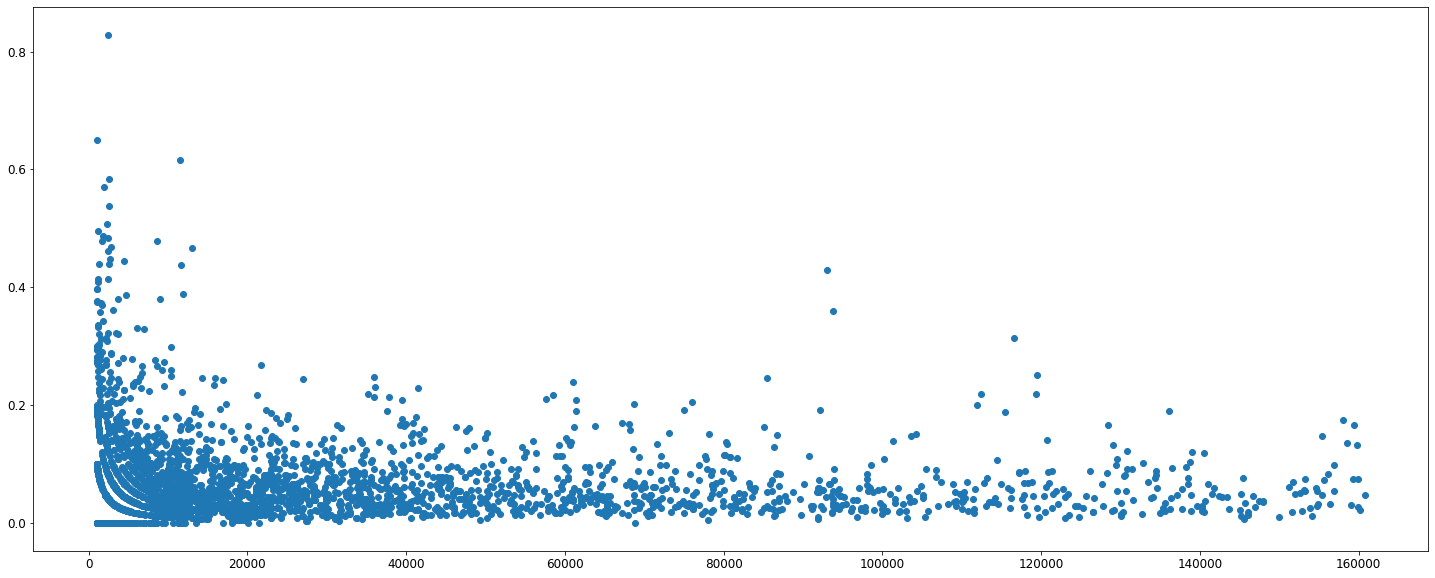

In [134]:

plt.scatter(df_Scat['impressions'], df_Scat['clickthru'])

In [ ]:
# answer to hyp 2 : there may be a hig CTR for really low impressions but not so much of a reverse relationship